## Computing Distances

### Agenda

* Computing Distance on Data Frame
    * Euclidean
    * Manhattan
    * Minkowski
    * Hamming
    * Jaccard
    * Gower’s
* Data Standardization
* Distance compution: Multi-data type attributes

In [1]:
import pandas as pd
import numpy as np

In [2]:
Data=pd.DataFrame({"Age":np.random.randint(25,50,10),"Experience":np.random.randint(0,10,10),
              "Gender":np.random.randint(0,2,10),"Occupation":np.random.randint(0,3,10),
                   "Rank":np.random.randint(1,4,10)})

In [3]:
Data

,Age,Experience,Gender,Occupation,Rank
0,32,6,1,2,1
1,40,9,0,1,3
2,30,1,0,2,1
3,35,4,0,0,2
4,30,1,0,1,2
5,49,6,0,2,1
6,29,0,0,1,1
7,27,0,0,1,2
8,40,8,1,0,1
9,41,9,1,0,1


In [4]:
# importing the required libraries
from scipy.spatial import distance
from scipy.spatial.distance import pdist, squareform

In [5]:
print(Data.iloc[0,:],sep=" ",)
print(Data.iloc[1,:],sep=" ")

Age           32
Experience     6
Gender         1
Occupation     2
Rank           1
Name: 0, dtype: int64
Age           40
Experience     9
Gender         0
Occupation     1
Rank           3
Name: 1, dtype: int64


In [6]:
distance.euclidean(Data.iloc[0,:],Data.iloc[1,:])

8.888194417315589

In [7]:
distances = pdist(Data, metric='euclidean')
distances

array([ 8.88819442,  5.47722558,  4.35889894,  5.65685425, 17.02938637,
        6.8556546 ,  8.        ,  8.48528137,  9.69535971, 13.        ,
        7.21110255, 12.84523258,  9.74679434, 14.35270009, 15.84297952,
        2.64575131,  2.64575131,  6.244998  ,  1.41421356, 19.6468827 ,
        1.73205081,  3.46410162, 12.40967365, 13.78404875,  5.91607978,
       14.31782106,  7.34846923,  9.        ,  6.55743852,  7.93725393,
       19.6977156 ,  1.73205081,  3.16227766, 12.32882801, 13.7113092 ,
       20.90454496, 22.84731932,  9.48683298,  8.83176087,  2.23606798,
       13.67479433, 15.06651917, 15.3622915 , 16.73320053,  1.41421356])

In [8]:
dist_matrix = pd.DataFrame(squareform(distances))

In [9]:
dist_matrix

,0,1,2,3,4,5,6,7,8,9
0,0.000000,8.888194,5.477226,4.358899,5.656854,17.029386,6.855655,8.000000,8.485281,9.695360
1,8.888194,0.000000,13.000000,7.211103,12.845233,9.746794,14.352700,15.842980,2.645751,2.645751
2,5.477226,13.000000,0.000000,6.244998,1.414214,19.646883,1.732051,3.464102,12.409674,13.784049
3,4.358899,7.211103,6.244998,0.000000,5.916080,14.317821,7.348469,9.000000,6.557439,7.937254
4,5.656854,12.845233,1.414214,5.916080,0.000000,19.697716,1.732051,3.162278,12.328828,13.711309
5,17.029386,9.746794,19.646883,14.317821,19.697716,0.000000,20.904545,22.847319,9.486833,8.831761
6,6.855655,14.352700,1.732051,7.348469,1.732051,20.904545,0.000000,2.236068,13.674794,15.066519
7,8.000000,15.842980,3.464102,9.000000,3.162278,22.847319,2.236068,0.000000,15.362291,16.733201
8,8.485281,2.645751,12.409674,6.557439,12.328828,9.486833,13.674794,15.362291,0.000000,1.414214
9,9.695360,2.645751,13.784049,7.937254,13.711309,8.831761,15.066519,16.733201,1.414214,0.000000


In [10]:
Data2=Data.loc[:,['Age','Experience']]
Data2

,Age,Experience
0,32,6
1,40,9
2,30,1
3,35,4
4,30,1
5,49,6
6,29,0
7,27,0
8,40,8
9,41,9


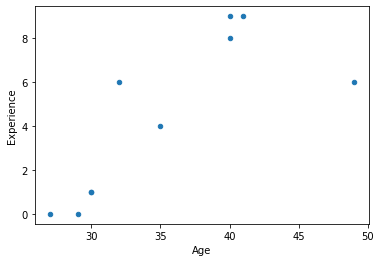

In [11]:
import matplotlib.pyplot as plt 
Data2.plot("Age","Experience",kind='scatter') 
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Data2)
Data2_std = pd.DataFrame(scaler.transform(Data2),
                       columns=Data2.columns)
Data2_std

,Age,Experience
0,-0.497437,0.457330
1,0.708471,1.314822
2,-0.798914,-0.971825
3,-0.045222,-0.114332
4,-0.798914,-0.971825
5,2.065118,0.457330
6,-0.949653,-1.257656
7,-1.251130,-1.257656
8,0.708471,1.028992
9,0.859210,1.314822


In [13]:
 distance.euclidean(Data2_std.iloc[0,:],Data2_std.iloc[1,:])

1.4796989791151862

In [14]:
 distance.cityblock(Data2_std.iloc[0,:],Data2_std.iloc[1,:])

2.0634012767689027

In [15]:
 distance.minkowski(Data2_std.iloc[0,:],Data2_std.iloc[1,:],3)

1.3359137899785487

In [16]:
distances = pdist(Data2_std, metric='minkowski',p=5)
dist_matrix = pd.DataFrame(squareform(distances))
dist_matrix

,0,1,2,3,4,5,6,7,8,9
0,0.000000,1.246874,1.429274,0.603362,1.429274,2.562555,1.715423,1.720572,1.211628,1.382977
1,1.246874,0.000000,2.340940,1.440629,2.340940,1.382977,2.627330,2.692675,0.285831,0.150739
2,1.429274,2.340940,0.000000,0.932956,0.000000,2.881539,0.288126,0.460992,2.089687,2.371761
3,0.603362,1.440629,0.932956,0.000000,0.932956,2.110955,1.206724,1.351190,1.170470,1.457057
4,1.429274,2.340940,0.000000,0.932956,0.000000,2.881539,0.288126,0.460992,2.089687,2.371761
5,2.562555,1.382977,2.881539,2.110955,2.881539,0.000000,3.049863,3.340426,1.360233,1.246874
6,1.715423,2.627330,0.288126,1.206724,0.288126,3.049863,0.000000,0.301477,2.371761,2.655398
7,1.720572,2.692675,0.460992,1.351190,0.460992,3.340426,0.301477,0.000000,2.467183,2.740270
8,1.211628,0.285831,2.089687,1.170470,2.089687,1.360233,2.371761,2.467183,0.000000,0.288126
9,1.382977,0.150739,2.371761,1.457057,2.371761,1.246874,2.655398,2.740270,0.288126,0.000000


In [17]:
Data3=Data.loc[:,['Gender','Occupation']]
Data3

,Gender,Occupation
0,1,2
1,0,1
2,0,2
3,0,0
4,0,1
5,0,2
6,0,1
7,0,1
8,1,0
9,1,0


In [18]:
distances = pdist(pd.get_dummies(Data3), metric='hamming')
dist_matrix = pd.DataFrame(squareform(distances))
dist_matrix

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.5,1.0,1.0,0.5,1.0,1.0,0.5,0.5
1,1.0,0.0,0.5,0.5,0.0,0.5,0.0,0.0,1.0,1.0
2,0.5,0.5,0.0,0.5,0.5,0.0,0.5,0.5,1.0,1.0
3,1.0,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5,0.5
4,1.0,0.0,0.5,0.5,0.0,0.5,0.0,0.0,1.0,1.0
5,0.5,0.5,0.0,0.5,0.5,0.0,0.5,0.5,1.0,1.0
6,1.0,0.0,0.5,0.5,0.0,0.5,0.0,0.0,1.0,1.0
7,1.0,0.0,0.5,0.5,0.0,0.5,0.0,0.0,1.0,1.0
8,0.5,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.0,0.0
9,0.5,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.0,0.0


In [19]:
distances = pdist(pd.get_dummies(Data3), metric='jaccard')
dist_matrix = pd.DataFrame(squareform(distances))
dist_matrix

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.5,1.0,1.0,0.5,1.0,1.0,0.5,0.5
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,0.5,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
5,0.5,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
6,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
7,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
8,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
9,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [20]:
Data2

,Age,Experience
0,32,6
1,40,9
2,30,1
3,35,4
4,30,1
5,49,6
6,29,0
7,27,0
8,40,8
9,41,9


In [21]:
Data3

,Gender,Occupation
0,1,2
1,0,1
2,0,2
3,0,0
4,0,1
5,0,2
6,0,1
7,0,1
8,1,0
9,1,0


In [22]:
Data

,Age,Experience,Gender,Occupation,Rank
0,32,6,1,2,1
1,40,9,0,1,3
2,30,1,0,2,1
3,35,4,0,0,2
4,30,1,0,1,2
5,49,6,0,2,1
6,29,0,0,1,1
7,27,0,0,1,2
8,40,8,1,0,1
9,41,9,1,0,1


In [23]:
Data3.Gender = Data3.Gender.astype('category')
Data3.Occupation = Data3.Occupation.astype('category')
Data3_dummy=pd.get_dummies(Data3)
Data3_dummy

,Gender_0,Gender_1,Occupation_0,Occupation_1,Occupation_2
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,0,1
3,1,0,1,0,0
4,1,0,0,1,0
5,1,0,0,0,1
6,1,0,0,1,0
7,1,0,0,1,0
8,0,1,1,0,0
9,0,1,1,0,0


In [24]:
Data4=Data.loc[:,['Rank']]
Data4

,Rank
0,1
1,3
2,1
3,2
4,2
5,1
6,1
7,2
8,1
9,1


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Data4)
Data4_std = pd.DataFrame(scaler.transform(Data4),
                       columns=Data4.columns)
Data4_std

,Rank
0,0.0
1,1.0
2,0.0
3,0.5
4,0.5
5,0.0
6,0.0
7,0.5
8,0.0
9,0.0


In [26]:
print(Data2_std)
print(Data3_dummy)
print(Data4_std)

        Age  Experience
0 -0.497437    0.457330
1  0.708471    1.314822
2 -0.798914   -0.971825
3 -0.045222   -0.114332
4 -0.798914   -0.971825
5  2.065118    0.457330
6 -0.949653   -1.257656
7 -1.251130   -1.257656
8  0.708471    1.028992
9  0.859210    1.314822
   Gender_0  Gender_1  Occupation_0  Occupation_1  Occupation_2
0         0         1             0             0             1
1         1         0             0             1             0
2         1         0             0             0             1
3         1         0             1             0             0
4         1         0             0             1             0
5         1         0             0             0             1
6         1         0             0             1             0
7         1         0             0             1             0
8         0         1             1             0             0
9         0         1             1             0             0
   Rank
0   0.0
1   1.0
2   0.0


In [27]:
Data_Final=pd.concat([Data2_std,Data3_dummy,Data4_std],axis=1)
Data_Final

,Age,Experience,Gender_0,Gender_1,Occupation_0,Occupation_1,Occupation_2,Rank
0,-0.497437,0.457330,0,1,0,0,1,0.0
1,0.708471,1.314822,1,0,0,1,0,1.0
2,-0.798914,-0.971825,1,0,0,0,1,0.0
3,-0.045222,-0.114332,1,0,1,0,0,0.5
4,-0.798914,-0.971825,1,0,0,1,0,0.5
5,2.065118,0.457330,1,0,0,0,1,0.0
6,-0.949653,-1.257656,1,0,0,1,0,0.0
7,-1.251130,-1.257656,1,0,0,1,0,0.5
8,0.708471,1.028992,0,1,1,0,0,0.0
9,0.859210,1.314822,0,1,1,0,0,0.0


In [28]:
distances = pdist(Data_Final, metric='euclidean')
dist_matrix = pd.DataFrame(squareform(distances))
dist_matrix

,0,1,2,3,4,5,6,7,8,9
0,0.000000,2.681326,2.033070,2.186618,2.526534,2.926891,2.673140,2.785539,1.944483,2.139108
1,2.681326,0.000000,3.240520,2.204662,2.784056,2.361310,3.219786,3.272260,2.254262,2.241143
2,2.033070,3.240520,0.000000,1.885032,1.500000,3.200807,1.450662,1.592545,3.205539,3.460944
3,2.186618,2.204662,1.885032,0.000000,1.817511,2.651477,2.091694,2.182064,2.031069,2.260637
4,2.526534,2.784056,1.500000,1.817511,0.000000,3.534850,0.595333,0.534975,3.244299,3.496875
5,2.926891,2.361310,3.200807,2.651477,3.534850,0.000000,3.745667,4.023516,2.483403,2.487872
6,2.673140,3.219786,1.450662,2.091694,0.595333,3.745667,0.000000,0.583857,3.460944,3.726879
7,2.785539,3.272260,1.592545,2.182064,0.534975,4.023516,0.583857,0.000000,3.649492,3.914228
8,1.944483,2.254262,3.205539,2.031069,3.244299,2.483403,3.460944,3.649492,0.000000,0.323143
9,2.139108,2.241143,3.460944,2.260637,3.496875,2.487872,3.726879,3.914228,0.323143,0.000000


In [29]:
distances = pdist(Data_Final, metric='cosine')
dist_matrix = pd.DataFrame(squareform(distances))
dist_matrix

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.930569,0.678778,1.012630,1.015328,0.954392,1.030967,0.987039,0.621932,0.645629
1,0.930569,0.000000,1.194916,0.617201,0.853441,0.473399,1.067399,1.007525,0.570203,0.516428
2,0.678778,1.194916,0.000000,0.597280,0.303026,1.019580,0.256239,0.267325,1.438447,1.490992
3,1.012630,0.617201,0.597280,0.000000,0.525788,0.776902,0.627610,0.585184,0.700592,0.745100
4,1.015328,0.853441,0.303026,0.525788,0.000000,1.219685,0.039673,0.016784,1.423906,1.474709
5,0.954392,0.473399,1.019580,0.776902,1.219685,0.000000,1.285158,1.365235,0.597257,0.558229
6,1.030967,1.067399,0.256239,0.627610,0.039673,1.285158,0.000000,0.030348,1.492272,1.551821
7,0.987039,1.007525,0.267325,0.585184,0.016784,1.365235,0.030348,0.000000,1.497404,1.555714
8,0.621932,0.570203,1.438447,0.700592,1.423906,0.597257,1.492272,1.497404,0.000000,0.006658
9,0.645629,0.516428,1.490992,0.745100,1.474709,0.558229,1.551821,1.555714,0.006658,0.000000


In [30]:
Data

,Age,Experience,Gender,Occupation,Rank
0,32,6,1,2,1
1,40,9,0,1,3
2,30,1,0,2,1
3,35,4,0,0,2
4,30,1,0,1,2
5,49,6,0,2,1
6,29,0,0,1,1
7,27,0,0,1,2
8,40,8,1,0,1
9,41,9,1,0,1


In [31]:
Data_Final2=pd.concat([Data.iloc[:,0:4],Data4_std],axis=1)
Data_Final2

,Age,Experience,Gender,Occupation,Rank
0,32,6,1,2,0.0
1,40,9,0,1,1.0
2,30,1,0,2,0.0
3,35,4,0,0,0.5
4,30,1,0,1,0.5
5,49,6,0,2,0.0
6,29,0,0,1,0.0
7,27,0,0,1,0.5
8,40,8,1,0,0.0
9,41,9,1,0,0.0


#### Manual Calculation

In [34]:
num_cols=["Age","Experience"]
Num= Data_Final2.loc[:,["Age","Experience"]]
Cat= Data_Final2.loc[:,["Gender"]]
print(Num)
print(Cat)

   Age  Experience
0   32           6
1   40           9
2   30           1
3   35           4
4   30           1
5   49           6
6   29           0
7   27           0
8   40           8
9   41           9
  Gender
0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      1
9      1


In [35]:
import numpy as np
s1 = pdist(np.array(Num[["Age"]]),metric='cityblock')
s1=pd.DataFrame(squareform(s1))
s1

,0,1,2,3,4,5,6,7,8,9
0,0.0,8.0,2.0,3.0,2.0,17.0,3.0,5.0,8.0,9.0
1,8.0,0.0,10.0,5.0,10.0,9.0,11.0,13.0,0.0,1.0
2,2.0,10.0,0.0,5.0,0.0,19.0,1.0,3.0,10.0,11.0
3,3.0,5.0,5.0,0.0,5.0,14.0,6.0,8.0,5.0,6.0
4,2.0,10.0,0.0,5.0,0.0,19.0,1.0,3.0,10.0,11.0
5,17.0,9.0,19.0,14.0,19.0,0.0,20.0,22.0,9.0,8.0
6,3.0,11.0,1.0,6.0,1.0,20.0,0.0,2.0,11.0,12.0
7,5.0,13.0,3.0,8.0,3.0,22.0,2.0,0.0,13.0,14.0
8,8.0,0.0,10.0,5.0,10.0,9.0,11.0,13.0,0.0,1.0
9,9.0,1.0,11.0,6.0,11.0,8.0,12.0,14.0,1.0,0.0


In [36]:
s2= pdist(np.array(Num[["Experience"]]),metric='cityblock')
s2=pd.DataFrame(squareform(s2))
s2

,0,1,2,3,4,5,6,7,8,9
0,0.0,3.0,5.0,2.0,5.0,0.0,6.0,6.0,2.0,3.0
1,3.0,0.0,8.0,5.0,8.0,3.0,9.0,9.0,1.0,0.0
2,5.0,8.0,0.0,3.0,0.0,5.0,1.0,1.0,7.0,8.0
3,2.0,5.0,3.0,0.0,3.0,2.0,4.0,4.0,4.0,5.0
4,5.0,8.0,0.0,3.0,0.0,5.0,1.0,1.0,7.0,8.0
5,0.0,3.0,5.0,2.0,5.0,0.0,6.0,6.0,2.0,3.0
6,6.0,9.0,1.0,4.0,1.0,6.0,0.0,0.0,8.0,9.0
7,6.0,9.0,1.0,4.0,1.0,6.0,0.0,0.0,8.0,9.0
8,2.0,1.0,7.0,4.0,7.0,2.0,8.0,8.0,0.0,1.0
9,3.0,0.0,8.0,5.0,8.0,3.0,9.0,9.0,1.0,0.0


In [37]:
s1_1 = s1/np.ptp(Num['Age'])
s2_1 = s2/np.ptp(Num['Experience'])

In [38]:
s1_1

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.363636,0.090909,0.136364,0.090909,0.772727,0.136364,0.227273,0.363636,0.409091
1,0.363636,0.000000,0.454545,0.227273,0.454545,0.409091,0.500000,0.590909,0.000000,0.045455
2,0.090909,0.454545,0.000000,0.227273,0.000000,0.863636,0.045455,0.136364,0.454545,0.500000
3,0.136364,0.227273,0.227273,0.000000,0.227273,0.636364,0.272727,0.363636,0.227273,0.272727
4,0.090909,0.454545,0.000000,0.227273,0.000000,0.863636,0.045455,0.136364,0.454545,0.500000
5,0.772727,0.409091,0.863636,0.636364,0.863636,0.000000,0.909091,1.000000,0.409091,0.363636
6,0.136364,0.500000,0.045455,0.272727,0.045455,0.909091,0.000000,0.090909,0.500000,0.545455
7,0.227273,0.590909,0.136364,0.363636,0.136364,1.000000,0.090909,0.000000,0.590909,0.636364
8,0.363636,0.000000,0.454545,0.227273,0.454545,0.409091,0.500000,0.590909,0.000000,0.045455
9,0.409091,0.045455,0.500000,0.272727,0.500000,0.363636,0.545455,0.636364,0.045455,0.000000


In [39]:
s2_1

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.333333,0.555556,0.222222,0.555556,0.000000,0.666667,0.666667,0.222222,0.333333
1,0.333333,0.000000,0.888889,0.555556,0.888889,0.333333,1.000000,1.000000,0.111111,0.000000
2,0.555556,0.888889,0.000000,0.333333,0.000000,0.555556,0.111111,0.111111,0.777778,0.888889
3,0.222222,0.555556,0.333333,0.000000,0.333333,0.222222,0.444444,0.444444,0.444444,0.555556
4,0.555556,0.888889,0.000000,0.333333,0.000000,0.555556,0.111111,0.111111,0.777778,0.888889
5,0.000000,0.333333,0.555556,0.222222,0.555556,0.000000,0.666667,0.666667,0.222222,0.333333
6,0.666667,1.000000,0.111111,0.444444,0.111111,0.666667,0.000000,0.000000,0.888889,1.000000
7,0.666667,1.000000,0.111111,0.444444,0.111111,0.666667,0.000000,0.000000,0.888889,1.000000
8,0.222222,0.111111,0.777778,0.444444,0.777778,0.222222,0.888889,0.888889,0.000000,0.111111
9,0.333333,0.000000,0.888889,0.555556,0.888889,0.333333,1.000000,1.000000,0.111111,0.000000
